# Estimating Distributions and Densities

Histogram was probably one of the first things you learned  how  to  do  in  baby  stats  (if  not  before)

<center>
<img src="https://uk.mathworks.com/help/examples/matlab/win64/SavingAndLoadingHistogramObjectsExample_01.png" alt="Drawing" style="width: 500px;"/></center>




- This  is  a  simple  way of estimating a distribution:  
    - we split the sample space up into bins, 
    - count how many samples fall into each bin, and 
    - then divide the counts by the total number of samples.




- If we hold the bins fixed and take more and more data, then by the [law of large numbers](https://en.wikipedia.org/wiki/Law_of_large_numbers) we anticipate that the relative frequency for each bin will converge on the bin’s probability.

#### Where do we get pdfs?  

- Well, one thing we could do is to take our histogram estimate, and then say that the probability density is uniform within each bin. This gives us a piecewise-constant estimate of the density.


- Unfortunately, this isn’t going to work 
    — isn’t going to converge on the true pdf 
    — unless we can shrink the bins of the histogram as we get more and more data. 

Estimating the statistical properties of data is a deeply researched field. The difficulty arises in a few ways:

- **Choosing the distribution** from which we are going to assume the data was generated from.
    <br></br>    <br></br>    
    - **Which function?**
    <br></br>    <br></br>
    - **What are its parameters?**


- Making the estimators robust so that they are not too sensitive to the changes in data.


- Fitting the data to the chosen distribution to obtain the best estimate effectively.


- Making sure the estimators generalize well to the population and not just the sample data.

#### Estimator

Given a sample of data that is generated from some distribution with fixed parameters,



<div style="font-size: 150%;">  
$$x_i \sim f(x_i) \sim P(\mu,\sigma)$$
</div>

***An estimator is essentially an estimate of the mean and variance of the distribution calculated using the sample data.***

This problem is tightly connected with 
- the structure of the data, 


- the number of data points, 


- how it is generated and


- if there are any missing values.

### Example: Nashville Precipitation

The dataset `nashville_precip.txt` contains [NOAA precipitation data for Nashville measured since 1871](http://bit.ly/nasvhville_precip_data). 


In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from IPython.display import HTML, display

pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', 25)

In [3]:
precip = pd.read_table("data/nashville_precip.txt", index_col=0, na_values='NA', delim_whitespace=True)
precip.head()

/home/sdmohant/.virtualenvs/datascience2/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  """Entry point for launching an IPython kernel.


       Jan   Feb   Mar    Apr   May   Jun   Jul   Aug   Sep   Oct   Nov   Dec
Year                                                                         
1871  2.76  4.58  5.01   4.13  3.30  2.98  1.58  2.36  0.95  1.31  2.13  1.65
1872  2.32  2.11  3.14   5.91  3.09  5.17  6.10  1.65  4.50  1.58  2.25  2.38
1873  2.96  7.14  4.11   3.59  6.31  4.20  4.63  2.36  1.81  4.28  4.36  5.94
1874  5.22  9.23  5.36  11.84  1.49  2.87  2.65  3.52  3.12  2.63  6.12  4.19
1875  6.15  3.06  8.14   4.22  1.73  5.63  8.12  1.60  3.79  1.25  5.46  4.30

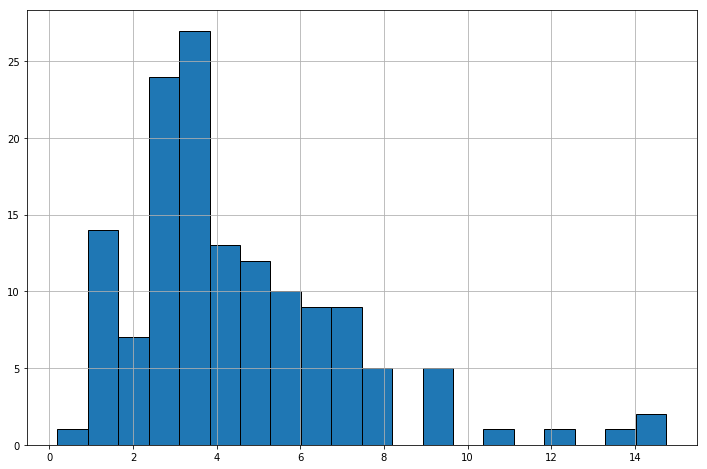

In [4]:
#Histogram of Jan Rainfall
precip.Jan.hist(bins=20, ec='black', figsize=(12,8))

The first step is recognizing what sort of distribution to fit our data to. A couple of observations:

1. The data are skewed, with a longer tail to the right than to the left

2. The data are positive-valued, since they are measuring rainfall.

3. The data are continuous

Based on our previous discussion what ***distribution*** does it fit?

- The gamma distribution is often a good fit to aggregated rainfall data, and will be our candidate distribution in this case.

### **Gamma distribution**:

<div style="font-size: 150%;">  
$$f(x;\alpha, \beta) \sim P(\mu,\sigma) \sim \text{Gamma}(\alpha, \beta) = \frac{\beta^{\alpha}x^{\alpha-1}e^{-\beta x}}{\Gamma(\alpha)}$$
</div>

## Estimator 1 - Method of Moments (MoM)

The ***method of moments*** simply ***assigns the empirical (sample) mean and variance to their theoretical counterparts, so that we can solve for the parameters.***

* ***Method of moments*** - chooses the parameters so that the sample moments (typically the sample mean and variance) match the theoretical moments of our chosen distribution.

So, for the gamma distribution, the mean and variance are:

<div style="font-size: 150%;">  
$$ \hat{\mu} = \bar{X} = \alpha \beta $$
$$ \hat{\sigma}^2 = S^2 = \alpha \beta^2 $$
</div>

So, if we solve for these parameters, we can use a gamma distribution to describe our data:

<div style="font-size: 150%;">  
$$ \alpha = \frac{\bar{X}^2}{S^2}, \, \beta = \frac{S^2}{\bar{X}} $$
</div>

### MoM applied to Nashville Precipitation

Let's deal with the missing value in the October data. Given what we are trying to do, it is most sensible to fill in the missing value with the average/mean of the available values.

In [5]:
precip.fillna(value={'Oct': precip.Oct.mean()}, inplace=True)

Now, let's calculate the sample moments of interest, the means ($\hat{\mu}$) and variances ($\hat{\sigma}^2$) by month:

In [6]:
precip_mean = precip.mean()
precip_mean

Jan    4.523688
Feb    4.097801
Mar    4.977589
Apr    4.204468
May    4.325674
Jun    3.873475
Jul    3.895461
Aug    3.367305
Sep    3.377660
Oct    2.610500
Nov    3.685887
Dec    4.176241
dtype: float64

Lets look at the variance ($\hat{\sigma}^2$)

In [7]:
precip_var = precip.var()
precip_var

Jan    6.928862
Feb    5.516660
Mar    5.365444
Apr    4.117096
May    5.306409
Jun    5.033206
Jul    3.777012
Aug    3.779876
Sep    4.940099
Oct    2.741659
Nov    3.679274
Dec    5.418022
dtype: float64

We then use these moments to estimate $\alpha$ and $\beta$ for each month:

<div style="font-size: 150%;">  
$$ \alpha = \frac{\bar{X}^2}{S^2}, \, \beta = \frac{S^2}{\bar{X}} $$
</div>

In [8]:
alpha_mom = precip_mean ** 2 / precip_var
beta_mom = precip_var / precip_mean

Now that we have our $\alpha$ and $\beta$, lets plug back into the formula:

<div style="font-size: 150%;">  
$$f(x;\alpha, \beta) \sim \text{Gamma}(\alpha, \beta) = \frac{\beta^{\alpha}x^{\alpha-1}e^{-\beta x}}{\Gamma(\alpha)}$$
</div>

As it is a continious function we can evaluate ```pdf()``` at each point to get the distribution.

We can use the `gamma.pdf()` function in `scipy.stats.distributions` to plot the distributions implied by the calculated alphas and betas. For example, here is January:

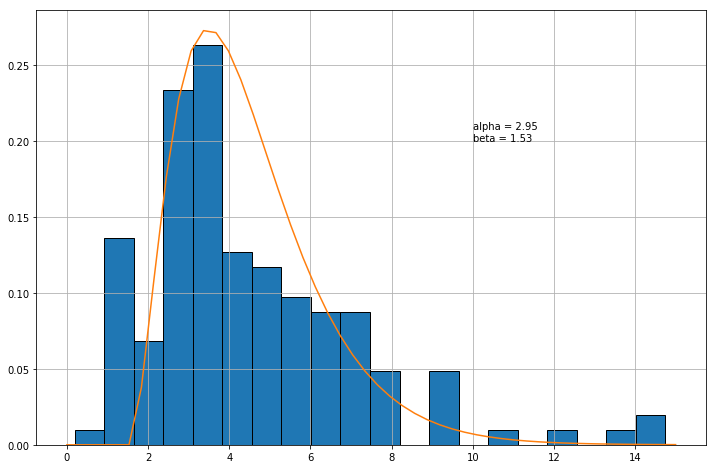

In [9]:
from scipy.stats.distributions import gamma

precip.Jan.hist(density=True, bins=20, ec='black', figsize=(12,8))
label = 'alpha = {0:.2f}\nbeta = {1:.2f}'.format(alpha_mom[0], beta_mom[0])
plt.annotate(label, xy=(10, 0.2))
plt.plot(np.linspace(0, 15), gamma.pdf(np.linspace(0, 15), alpha_mom[0], beta_mom[0]))

Looping over all months, we can create a grid of plots for the distribution of rainfall, using the gamma distribution:

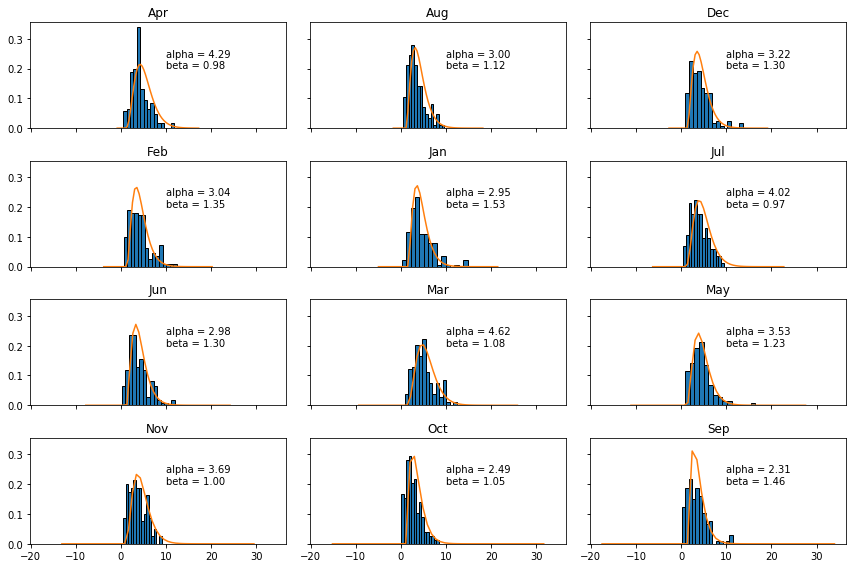

In [10]:
axs = precip.hist(density=True, figsize=(12, 8), sharex=True, sharey=True, bins=15, grid=False, ec='black')

for ax in axs.ravel():
    
    # Get month
    m = ax.get_title()
    
    # Plot fitted distribution
    x = np.linspace(*ax.get_xlim())
    ax.plot(x, gamma.pdf(x, alpha_mom[m], beta_mom[m]))
    
    # Annotate with parameter estimates
    label = 'alpha = {0:.2f}\nbeta = {1:.2f}'.format(alpha_mom[m], beta_mom[m])
    ax.annotate(label, xy=(10, 0.2))
    
plt.tight_layout()

##### We got a pretty good estimate..... Can we do better?



## Estimator 2 - Maximum Likelihood Estimation

Generally, we select a model and use observed data $X$ to create the model’s parameters $\theta$.

***How are the parameters actually estimated?***

For example, if we are ***sampling*** a random variable $X$ which we assume to be normally distributed some mean $\mu$ and standard deviation $\sigma$. 

- Our goal is to find estimations (for $\theta$) of $\mu$ and $\sigma$ from our sample which accurately represent the ***true*** $X$, not just the samples we’ve drawn out.

In other words:

- How do we maximize the likelihood (probability) our estimator $\theta$ is from the true $X$? and, 
- Once you have the sample value how do you know it is correct?

Let’s start with the Probability Density function (PDF) for the Normal Distribution, and dive into some of the maths.

<div style="font-size: 150%;">  
$$x_i \sim P(\mu,\sigma) = \text{Norm}(\mu, \sigma) = \frac{1}{\sqrt{2\pi\sigma^2}}e^\frac{-{(x_{i}-\mu)}^2}{2\sigma^2}$$
</div>

This equation is telling us the probability our sample $x_i$ from our random variable $X$, when the true parameters of the distribution are $\mu$ and $\sigma$.



Let’s say our sample is 3, what is the probability it comes from a distribution of $\mu$ = 3 and $\sigma$ = 1?

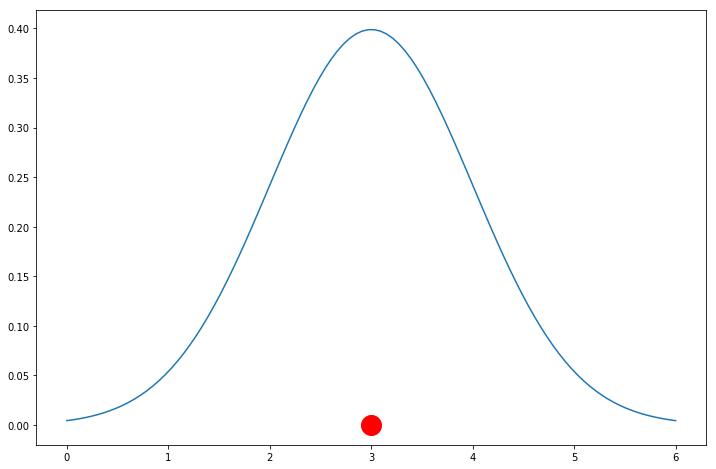

In [11]:
plt.figure(figsize=(12,8))
mu = 3
sigma = 1
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.plot(3, 0, marker='o', markersize=20, color="red")
plt.show()

In [12]:
stats.norm.pdf(3, 3, 1)

0.3989422804014327

What if it came from a distribution with μ = 7 and σ = 2?

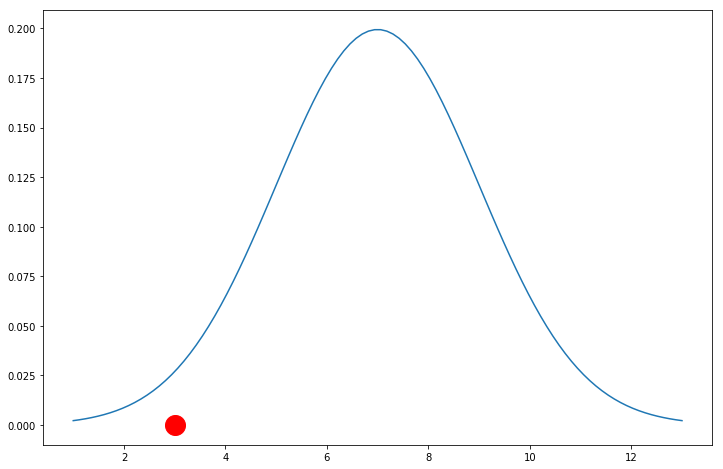

In [13]:
plt.figure(figsize=(12,8))
mu = 7
sigma = 2
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.plot(3, 0, marker='o', markersize=20, color="red")
plt.show()

In [14]:
stats.norm.pdf(3, 7, 2)

0.02699548325659403

The PDF equation has shown us how likely those values are to appear in a distribution with certain parameters. 

So it is much more likely it came from the first distribution. But what if we had a bunch of points we wanted to estimate?

Let’s assume we get a bunch samples from $X$ which we know to come from some normal distribution, and all are mutually independent from each other.


- if this is the case, the total probability of observing all of the data is the product of obtaining each data point individually. 

So if we want to see the probability of 2 and 6 ([Joint Probability](https://www.statisticshowto.datasciencecentral.com/joint-probability-distribution/)) are drawn from a distribution with μ = 4 and σ = 1 we get:

In [15]:
stats.norm.pdf(2, 4, 1)*stats.norm.pdf(6, 4, 1)

0.0029150244650281948

### Likelihood of Many Samples

Consider this sample: ```x = [4, 5, 7, 8, 8, 9, 10, 5, 2, 3, 5, 4, 8, 9]``` and let’s compare these values to both ```PDF ~ N(5, 3)``` and ```PDF ~ N(7, 3)```. 

- Our sample could be drawn from a variable that comes from these distributions, so let’s take a look.

<center>
<img src="./images/mle1.png" alt="Drawing" style="width: 900px;"/></center>

It could be quite likely our samples come from either of these distributions. 

<center>
<h3>But what is actually correct?</h3></center>

So we want to find ```p(2, 3, 4, 5, 7, 8, 9, 10; μ, σ)```.

- The probability these samples come from a normal distribution with μ and σ. 


- But we don’t know μ and σ, so we need to estimate them.

***Maximum likelihood estimation (MLE), is to specify a distributions of unknown parameters, then using your data to pull out the actual parameter values.***

Our $\theta$ is a parameter which estimates ```x = [4, 5, 7, 8, 8, 9, 10, 5, 2, 3, 5, 4, 8, 9]``` which we are assuming comes from a normal distribution PDF.

<div style="font-size: 115%;">  
$$f(x_i; \mu,\sigma) = \text{Norm}(\mu, \sigma) = \frac{1}{\sqrt{2\pi\sigma^2}}e^\frac{-{(x_{i}-\mu)}^2}{2\sigma^2}$$
</div>

- We want to maximize the likelihood our parameter $\theta$ comes from this distribution.


- To make things simpler we’re going to take the ```log``` of the equation.


- Overall we are tyring to define a function $f()$ where $x$ is most **likely** to appear.
    - due to the ```log``` we call it ```log likelihood```
    
    <center>
<img src="./images/mle2.png" alt="Drawing" style="width: 900px;"/></center>


In [16]:
# Compare the likelihood of the random samples to the two 
# distributions
def compare_data_to_dist(x, mu_1=5, mu_2=7, sd_1=3, sd_2=3):
    ll_1 = 0
    ll_2 = 0
    for i in x:
        ll_1 += np.log(stats.norm.pdf(i, mu_1, sd_1))
        ll_2 += np.log(stats.norm.pdf(i, mu_2, sd_2))
    
    print "The LL of of x for mu = %d and sd = %d is: %.4f" % (mu_1, sd_1, ll_1)
    print "The LL of of x for mu = %d and sd = %d is: %.4f" % (mu_2, sd_2, ll_2)

x = [4, 5, 7, 8, 8, 9, 10, 5, 2, 3, 5, 4, 8, 9]
compare_data_to_dist(x)

The LL of of x for mu = 5 and sd = 3 is: -33.9679
The LL of of x for mu = 7 and sd = 3 is: -33.3013


Looks like the second distribution (mu = 7 and sd = 3) is more likely. 

Instead of guessing some μ values, lets computationally evaluate a range of μ (continious). 

-Range ({ μ ∈ R| x ≥ 2 and x ≤ 10})

How does this look graphically?

- We want to plot a log likelihood for possible values of μ and σ. 

- Below we have fixed σ at 3.0 while our guess for μ are { μ ∈ R| x ≥ 2 and x ≤ 10}, and will be plotted on the x axis.

    <center>
<img src="./images/mle3.png" alt="Drawing" style="width: 900px;"/></center>

We can see the max of our likelihood function occurs around **6.2**. 

- However, as we change the estimate for σ 
    - the max of our function will fluctuate. 


- Our goal will be the find the values of μ and σ, that will **maximize (log) likelihood function.**

Now we want to substitute $\theta$ in for μ and σ in our likelihood function. Let’s call them θ\_mu and θ\_sigma.


To maximize our equation with respect to each of our parameters, we need to take the ***derivative*** and set the equation to zero.
- for μ
- for σ

First, let’s estimate θ\_mu from our ```Log Likelihood Equation``` above:

<center>
<img src="./images/mle4.png" alt="Drawing" style="width: 500px;"/></center>

Now we can be certain the maximum likelihood estimate for θ_mu is the sum of our observations, divided by the number of observations. 

And let’s do the same for θ_sigma.

<center>
<img src="./images/mle5.png" alt="Drawing" style="width: 600px;"/></center>

Now we know how to estimate both these parameters from the observations we have.

Let’s look at the visualization of how the MLE for θ\_mu and θ\_sigma is determined.

The max LL for sd 0.50 is -167.88
The max LL for sd 1.00 is -54.04
The max LL for sd 1.50 is -36.84
The max LL for sd 2.50 is -32.28
The max LL for sd 3.00 is -32.82
The max LL for sd 3.50 is -33.77


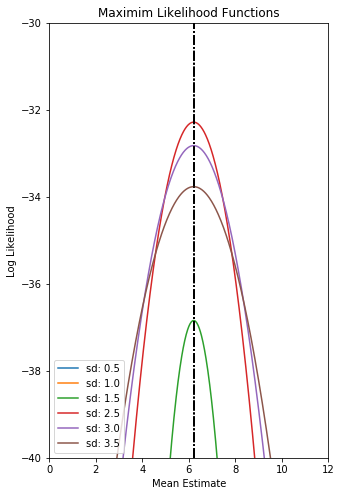

In [17]:
# Plot the Maximum Likelihood Functions for different values of mu 
# and sigma
def plot_ll(x):
    plt.figure(figsize=(5,8))
    plt.title("Maximim Likelihood Functions")
    plt.xlabel("Mean Estimate")
    plt.ylabel("Log Likelihood")
    plt.ylim(-40, -30)
    plt.xlim(0, 12)
    mu_set = np.linspace(0, 16, 1000)
    sd_set = [.5, 1, 1.5, 2.5, 3, 3.5]
    max_val = max_val_location = None
    for i in sd_set:
        ll_array = []
        
        for j in mu_set:
            temp_mm = 0
            
            for k in x:
                temp_mm += np.log(stats.norm.pdf(k, j, i)) # The LL function
            ll_array.append(temp_mm)
        
            if (max_val is None):
                max_val = max(ll_array)
            elif max(ll_array) > max_val:
                max_val = max(ll_array)
                max_val_location = j
        
        # Plot the results
        plt.plot(mu_set, ll_array, label="sd: %.1f" % i)
        
        print "The max LL for sd %.2f is %.2f" % (i, max(ll_array))    
        plt.axvline(x=max_val_location, color='black', ls='-.')
        plt.legend(loc='lower left')

plot_ll(x);

<center>
<img src="./images/mle6.png" alt="Drawing" style="width: 600px;"/></center>

Observations:

- Each maximum is clustered around the same single point **6.2**, which is our **θ\_mu**


- Changing our estimate for **θ\_sigma** changes which likelihood function provides our maximum value of **2.5**


This is called ***maximizing the likelihood function.***



#### Different Estimates and the Correct one
<center>
<img src="./images/mle7.png" alt="Drawing" style="width: 900px;"/></center>

### Back to our Nashville Example

##### Finding the MLE

We are going to use the Gamma function:

<div style="font-size: 150%;">  
$$f(x;\alpha, \beta) \sim \text{Gamma}(\alpha, \beta) = \frac{\beta^{\alpha}x^{\alpha-1}e^{-\beta x}}{\Gamma(\alpha)}$$
</div>

To find the maximum of any function, we typically take the ***derivative*** with respect to the variable to be maximized, set it to zero and solve for that variable. 

<div style="font-size: 125%;"> 
$$\frac{\partial l(\alpha,\beta)}{\partial \beta} = n\left(\frac{\alpha}{\beta} - \bar{x}\right) = 0$$
</div>

Which can be solved as $\beta = \alpha/\bar{x}$. However, plugging this into the derivative with respect to $\alpha$ yields:

<div style="font-size: 125%;">
$$\frac{\partial l(\alpha,\beta)}{\partial \alpha} = \log(\alpha) + \overline{\log(x)} - \log(\bar{x}) - \frac{\Gamma(\alpha)'}{\Gamma(\alpha)} = 0$$
</div>

This has no closed form solution. We must use ***numerical optimization***!

Numerical optimization alogarithms take an initial "guess" at the solution, and iteratively improve the guess until it gets "close enough" to the answer.

Here, we will use [Newton-Raphson algorithm](https://brilliant.org/wiki/newton-raphson-method/):

<div style="font-size: 150%;">  
$$x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}$$
</div>

Which is available to us via SciPy:

In [18]:
from scipy.optimize import newton

Here is a graphical example of how Newtone-Raphson converges on a solution, using an arbitrary function:

Text(1.47061,-0.2,'$x_{n+1}$')

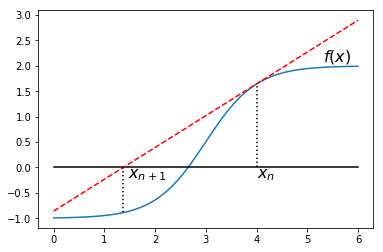

In [19]:
# some function
func = lambda x: 3./(1 + 400*np.exp(-2*x)) - 1
xvals = np.linspace(0, 6)
plt.plot(xvals, func(xvals))
plt.text(5.3, 2.1, '$f(x)$', fontsize=16)
# zero line
plt.plot([0,6], [0,0], 'k-')
# value at step n
plt.plot([4,4], [0,func(4)], 'k:')
plt.text(4, -.2, '$x_n$', fontsize=16)
# tangent line
tanline = lambda x: -0.858 + 0.626*x
plt.plot(xvals, tanline(xvals), 'r--')
# point at step n+1
xprime = 0.858/0.626
plt.plot([xprime, xprime], [tanline(xprime), func(xprime)], 'k:')
plt.text(xprime+.1, -.2, '$x_{n+1}$', fontsize=16)

To apply the Newton-Raphson algorithm, we need a function that returns a vector containing the **first and second derivatives** of the function with respect to the variable of interest. In our case, this is:

In [20]:
from scipy.special import psi, polygamma

dlgamma = lambda m, log_mean, mean_log: np.log(m) - psi(m) - log_mean + mean_log
dl2gamma = lambda m, *args: 1./m - polygamma(1, m)

where `log_mean` and `mean_log` are $\log{\bar{x}}$ and $\overline{\log(x)}$, respectively. `psi` and `polygamma` are complex functions of the Gamma function that result when you take first and second derivatives of that function.

In [21]:
# Calculate statistics
log_mean = precip.mean().apply(np.log)
mean_log = precip.apply(np.log).mean()

Time to optimize!

In [22]:
# Alpha MLE for December
alpha_mle = newton(dlgamma, 2, dl2gamma, args=(log_mean[-1], mean_log[-1]))
alpha_mle

3.5189679152399616

And now plug this back into the solution for beta:

<div style="font-size: 120%;">  
$$ \beta  = \frac{\alpha}{\bar{X}} $$
</div>

In [23]:
beta_mle = alpha_mle/precip.mean()[-1]
beta_mle

0.8426160754841373

We can compare the fit of the estimates derived from MLE to those from the method of moments:

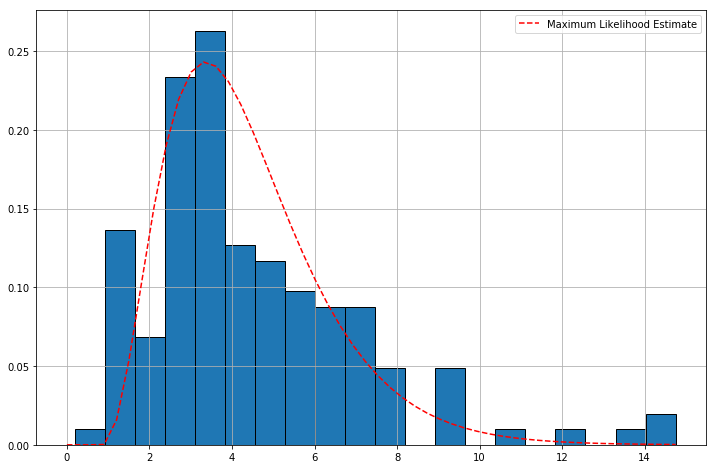

In [24]:
precip.Jan.hist(density=True, bins=20, ec='black', figsize=(12,8))
x = np.linspace(0, precip.Jan.max())
l1,=plt.plot(x, gamma.pdf(x, alpha_mle, beta_mle), 'r--',  label="Maximum Likelihood Estimate")
plt.legend(handles=[l1])

/home/sdmohant/.virtualenvs/datascience2/local/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


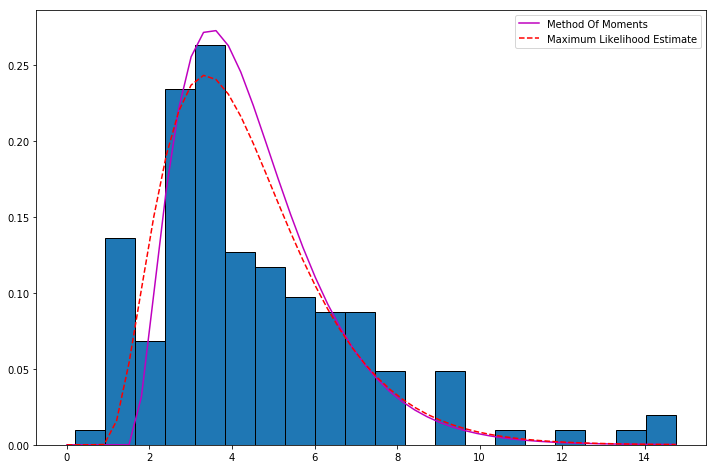

In [25]:
dec = precip.Jan
dec.hist(normed=True, bins=20, grid=False, ec='black', figsize=(12,8))
x = np.linspace(0, dec.max())
l1,=plt.plot(x, gamma.pdf(x, alpha_mom[0], beta_mom[0]), 'm-', label="Method Of Moments")
l2,=plt.plot(x, gamma.pdf(x, alpha_mle, beta_mle), 'r--',  label="Maximum Likelihood Estimate")
plt.legend(handles=[l1, l2])


For some common distributions, SciPy includes methods for fitting via MLE:

In [26]:
from scipy.stats import gamma

gamma.fit(precip.Jan)

(3.512456251316519, -0.1471060062162049, 1.3297838780067166)

This fit is not directly comparable to our estimates, however, because SciPy's `gamma.fit` method fits an odd 3-parameter version of the gamma distribution.

Other examples:

- [Maximum Likelihood Estimation](https://notes.quantecon.org/submission/5b3b102eb9eab00015b89f8e)
- [MLE for Different Distributions](https://nbviewer.jupyter.org/github/rasbt/pattern_classification/blob/master/parameter_estimation_techniques/max_likelihood_est_distributions.ipynb?create=1)

## Estimator 3 - Kernel Density Estimation - KDE

A ***histogram*** is the simplest non-parametric density estimator and the one that is mostly frequently encountered. To construct a histogram, 
- we divide the interval covered by the data values and then into equal sub-intervals, known as ***"bins"***. 
- Every time, a data value falls into a particular sub-interval, then a block, of size equal 1 by the ***binwidth***, is placed on top of it. 

<br></br>
- When we construct a histogram, we need to consider these two main points: 
    - the **size of the bins (the binwidth)** and 
    - the **end points of the bins**.

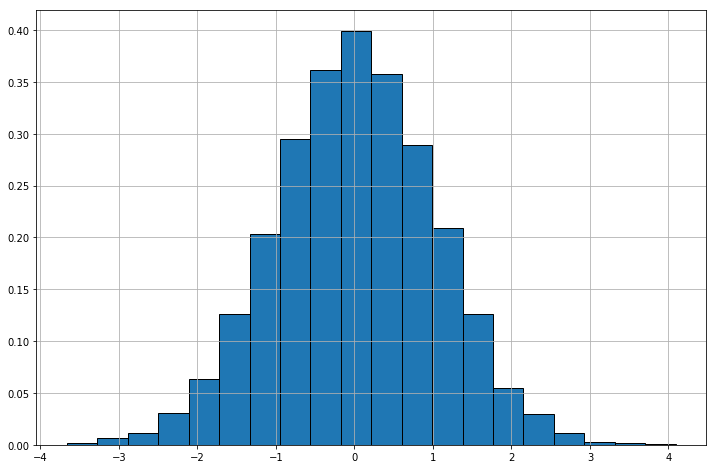

In [27]:
n = np.random.randn(100000)
df = pd.Series(np.random.randn(10000))
df.hist(bins=20, normed=True, ec='black', figsize=(12,8))

The above example has illustrated the properties of histograms: 
* not smooth
* depend on end points of bins
* depend on width of bins

We can alleviate the first two problems by using **Kernel Density Estimators (KDE)**. 



To remove the dependence on the end points of the bins, we center each of the blocks at each data point rather than fixing the end points of the blocks.

Lets take another example (adapted from [link](http://www.mvstat.net/tduong/research/seminars/seminar-2001-05/)):

- The data are (the log of) wing spans of aircraft built in from 1956 - 1984. (The complete dataset can be found in Bowman & Azzalini (1997) Applied Smoothing Techniques for Data Analysis.)

- We use a subset of this, namely observations 2, 22, 42, 62, 82, 102, 122, 142, 162, 182, 202 and 222. 
    - We are using the log values of the data. 
    - We only use a subset otherwise some plots become too crowded so it is for display purposes only. 
- The data points are represented by crosses on the x-axis.

<table><tr><td><img src='http://www.mvstat.net/tduong/research/seminars/seminar-2001-05/hist1.png'></td><td><img src='http://www.mvstat.net/tduong/research/seminars/seminar-2001-05/hist2.png'></td></tr></table>

- Left Histogram 
    - If we choose breaks (n) at 0 and 0.5 and a binwidth of 0.5
    
    - It appears that the this density is **unimodal (single peak) and skewed to the right**
    
    
    
    
- Right Histogram 
    - If we use the same binwidth but with the end points shifted up to 0.25 and 0.75

    - We now have a completely different estimate of the density - it now appears to be **bimodal (two peaks)**.


The choice of end points has a particularly marked effect of the shape of a histogram. 

The problem with our two binnings stems from the fact that ---

<center><h5>the height of the block stack often reflects not on the actual density of points nearby, but on coincidences of how the bins align with the data points.</h5><center>



- This mis-alignment between points and their blocks is a potential cause of the poor histogram results seen here.


- What if, instead of stacking the blocks aligned with the bins, ***we were to stack the blocks aligned with the points they represent?***
    - ***Centered on the points/observations***



- If we do this, the blocks won't be aligned, but we can add their contributions at each location along the x-axis to find the result.

### Box-Car Kernel

<center>
    <img src="http://www.mvstat.net/tduong/research/seminars/seminar-2001-05/box.png" alt="Drawing" style="width: 800px;"/>
</center>

- Placing a bin ***centered*** on the datapoint
    -  Block of width 1/2 and height 1/6 (the dotted boxes) as there are 12 data points, and then add them up. 
    - ***Moving average centered around the datapoint***
    



- This density estimate (the solid curve) is less blocky than either of the histograms, as we are starting to extract some of the finer structure. 
    - It suggests that the density is bimodal.
<br></br><br></br>




- This is known as **box kernel density estimate** - it is still discontinuous as we have used a discontinuous kernel as our building block. 

<br></br><br></br>

#### KDE solutions to histogram problem: 
* not smooth
    - If we use a smooth kernel for our building block, then we will have a smooth density estimate. 

* depend on end points of bins
    - No longer applicable we center on data

* depend on width of bins
    - Unfortunately we still can't remove the dependence on the bandwidth (which is the equivalent to a histogram's binwidth).

***It's important to choose the most appropriate bandwidth as a value.***
- too small or too large is not useful. 

###### Under-smoothed 
- If we use a normal (Gaussian) kernel with bandwidth or standard deviation of 0.1 (which has area 1/12 under the each curve) then the kernel density estimate is said to undersmoothed as the bandwidth is too small in the figure below. 

<center>
<img src="http://www.mvstat.net/tduong/research/seminars/seminar-2001-05/undersmooth.png" alt="Drawing" style="width: 800px;"/>
</center>

- It appears that there are 4 modes in this density - some of these are surely artifices of the data. 

- We can try to eliminate these artifices by increasing the bandwidth of the normal kernels to 0.5.

###### Over-smoothed
- We obtain a much flatter estimate with only one mode. 
    - This situation is said to be oversmoothed as we have chosen a bandwidth that is too large and have obscured most of the structure of the data.

<center>
<img src="http://www.mvstat.net/tduong/research/seminars/seminar-2001-05/oversmooth.png" alt="Drawing" style="width: 800px;"/>
</center>

###### Optimally-smoothed

- binwidth value between 0.1 and 0.5 (approximately .25)
<center>
<img src="http://www.mvstat.net/tduong/research/seminars/seminar-2001-05/optsmooth.png" alt="Drawing" style="width: 800px;"/>
</center>

Lets try to define Kernel and Kernel Density Estimates now....

### What is a Kernel?

A kernel is a special type of probability density function (PDF) with the added property that it must be even.  Thus, a kernel is a function with the following properties
* non-negative
* real-valued
* even

its definite integral over its support set must equal to 1



### What is Kernel Density Estimation?

Kernel density estimation is a non-parametric method of estimating the probability density function (PDF) of a continuous random variable.  

- It is non-parametric because it does not assume any underlying distribution for the variable.  

- Essentially, at every datum, a kernel function is created with the datum at its centre – this ensures that the kernel is symmetric about the datum.  

- The PDF is then estimated by adding all of these kernel functions and dividing by the number of data to ensure that it satisfies the 2 properties of a PDF:

    * Every possible value of the PDF (i.e. the function, $f(x)$), is non-negative.

    * The definite integral of the PDF over its support set equals to 1.



Intuitively, a kernel density estimate is a sum of **“bumps”**.  

<center> <h5>A “bump” is assigned to every datum, and the size of the “bump” represents the probability assigned at the neighbourhood of values around that datum.</h5></center>
    
- thus, if the data set contains
    * 2 data at x = 1.5
    * 1 datum at x = 0.5

- then the **“bump”** at x = 1.5 is twice as big as the “bump” at x = 0.5.

- Each “bump” is centred at the datum, and it spreads out symmetrically to cover the datum’s neighbouring values.  

- Each kernel has a bandwidth, and it determines the width of the “bump".
    - the width of the neighbourhood of values to which probability is assigned.  


- A bigger bandwidth results in a shorter and wider “bump” that spreads out farther from the centre and assigns more probability to the neighbouring values.

<center>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/2a/Kernel_density.svg/1200px-Kernel_density.svg.png" alt="Drawing" style="width: 1000px;"/>
</center>

### Choosing the Bandwidth

It turns out that the choosing the bandwidth is the most difficult step in creating a good kernel density estimate that captures the underlying distribution of the variable (Trosset, Page 166).  

Choosing the bandwidth is a complicated topic that is better addressed in a more advanced book or paper, but here are some useful guidelines:
<br></br><br></br>
* A small bandwidth ($bw$) results in a small standard deviation, and the kernel places most of the probability on the datum.  
    - Use this when the sample size is large and the data are tightly packed.
<br></br><br></br>
* A large bandwidth ($bw$) results in a large standard deviation, and the kernel spreads more of the probability from the datum to its neighbouring values.  
    - Use this when the sample size is small and the data are sparse.

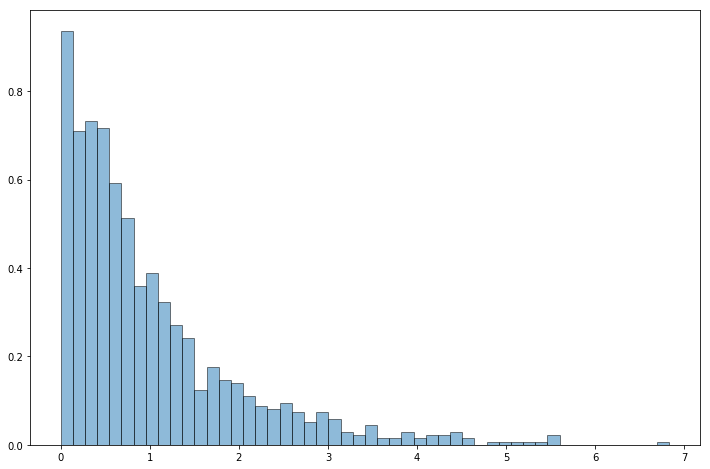

In [28]:
# generate data samples
data = stats.expon.rvs(loc=0, scale=1, size=1000, random_state=123)

plt.figure(figsize=(12,8))

# plot (normalized) histogram of the data
plt.hist(data, 50, density=1, alpha=0.5, ec='black');

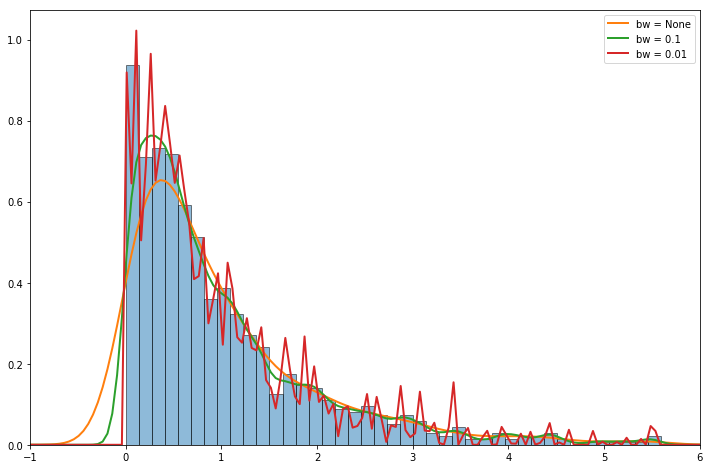

In [29]:
# test values for the bw_method option ('None' is the default value)
bw_values =  [None, 0.1, 0.01]

# generate a list of kde estimators for each bw
kde = [stats.gaussian_kde(data,bw_method=bw) for bw in bw_values]

plt.figure(figsize=(12,8))

plt.hist(data, 50, density=1, alpha=0.5,ec='black');

# plot density estimates
t_range = np.linspace(-2,8,200)
for i, bw in enumerate(bw_values):
    plt.plot(t_range,kde[i](t_range),lw=2, label='bw = '+str(bw))
plt.xlim(-1,6)
plt.legend(loc='best')

### Back to Nashville Precipitation Example

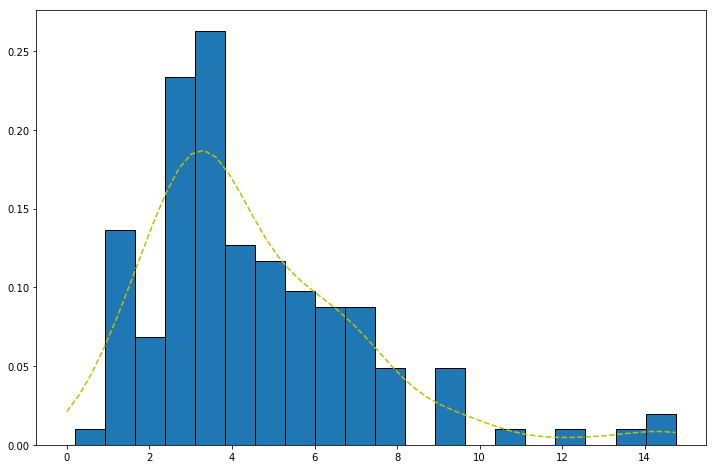

In [30]:
from scipy.stats import kde

jan = precip.Jan
jan.hist(normed=True, bins=20, grid=False, ec='black', figsize=(12,8))
x = np.linspace(0, jan.max())
density = kde.gaussian_kde(jan, bw_method=None)
xgrid = np.linspace(x.min(), x.max(), 100)

plt.plot(x, density(x), 'y--')

### Finding the best bandwidth

In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KernelDensity

grid = GridSearchCV(KernelDensity(),
                    {'bandwidth': np.linspace(0.1, 1.0, 30)},
                    cv=20) # 20-fold cross-validation
grid.fit(dec[:, None])
print grid.best_params_

{'bandwidth': 0.7206896551724138}


/home/sdmohant/.virtualenvs/datascience2/local/lib/python2.7/site-packages/sklearn/model_selection/_search.py:842: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


For all months

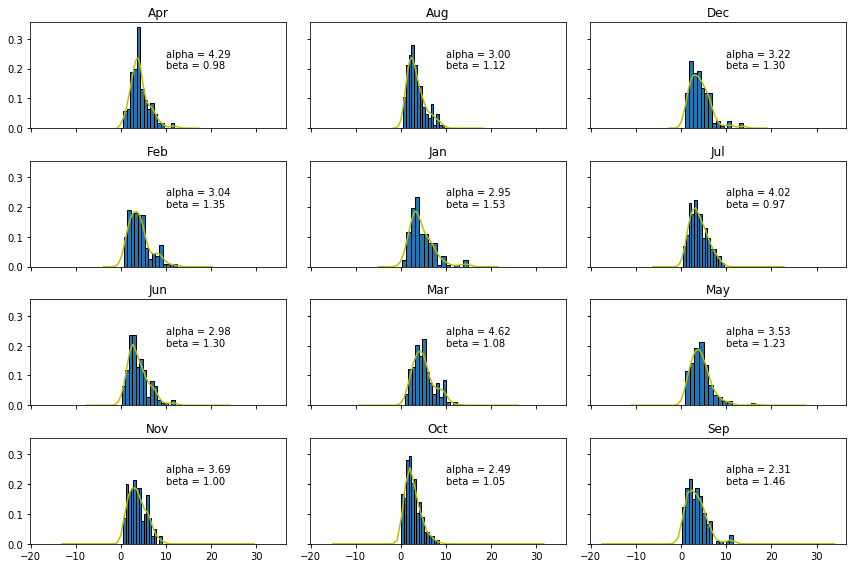

In [32]:
from scipy.stats import kde

axs = precip.hist(density=True, figsize=(12, 8), sharex=True, sharey=True, bins=15, grid=False, ec='black')

for ax in axs.ravel():
    
    # Get month
    m = ax.get_title()
    
    # Get KDE Plot
    x = np.linspace(*ax.get_xlim())
    density = kde.gaussian_kde(precip[m], bw_method=None)
    ax.plot(x, density(x), 'y-')
    
    # Annotate with parameter estimates
    label = 'alpha = {0:.2f}\nbeta = {1:.2f}'.format(alpha_mom[m], beta_mom[m])
    ax.annotate(label, xy=(10, 0.2))
    
plt.tight_layout()

### KDE Visually

https://mathisonian.github.io/kde/

# Comparing MoM, MLE, and KDE

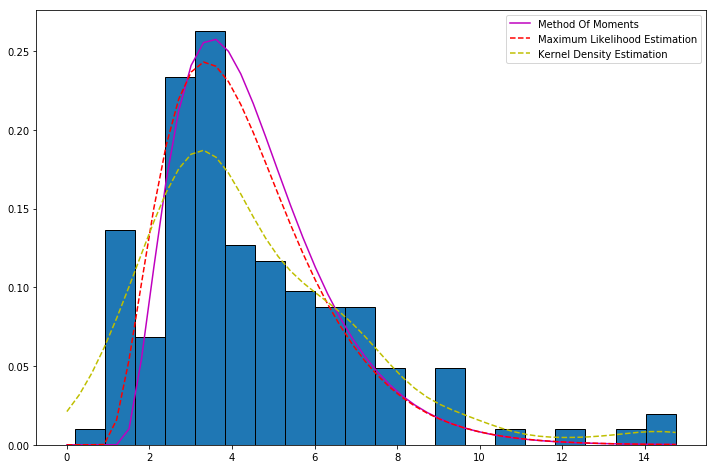

In [33]:
from scipy.stats import kde

jan = precip.Jan
jan.hist(normed=True, bins=20, grid=False, ec='black', figsize=(12,8))
x = np.linspace(0, jan.max())
density = kde.gaussian_kde(jan, bw_method=None)
xgrid = np.linspace(x.min(), x.max(), 100)

l1, = plt.plot(x, gamma.pdf(x, alpha_mom[-1], beta_mom[-1]), 'm-', label="Method Of Moments")
l2, = plt.plot(x, gamma.pdf(x, alpha_mle, beta_mle), 'r--', label="Maximum Likelihood Estimation")
l3, = plt.plot(x, density(x), 'y--', label="Kernel Density Estimation")
plt.legend(handles=[l1,l2,l3])

# MoM versus MLE versus KDE

- **MoM:**
    - Advantages:
        - Simple 
    
        - easy to use for normal curves.
    
        - Mean is the best statistic for locating this curve
    
    - Disadvantages:
        - Not robust/generalizable
        
        - Depends on sample size
        
    
    
- **MLE:**
    - Advantages:    
    
        - More robust/generalizable - Can be applied to a large set of problems
    
        - Greater efficiency

    - Disadvantages:
        - Evaluating and maximizing likelihood function is often challenging 
    
        - Difficult to write down complete statistical model of the joint distribution of the data
        
        - Heavily biased for small samples


- **KDE:**
    - Advantages:
        - works well when there is a lot of data.
    
        - non-parametric, no fixed structure and depend upon all the data points to reach an estimate
        
    - Disadvantages:
    
       - Figuring out bandwidth is a hard problem.